In [70]:
import ROOT
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from ROOT import TCanvas, TPaveText
from ROOT import gROOT
from scipy.stats import poisson

# Lets the expected number of events follows poisson distribution
The Expected number of background has mean 
$$
\nu_b = 1.3
$$
The expected number of signal events has mean 
$$
\nu_b = 2
$$
Our test statistics will be simple event count i.e t = N 

The $$H_0$$ hypothesis is the background only hypothesis , the $$g(N|H_0)$$ follows a poisson distribution with mean  $$\nu_b = 1.3$$ and the $$H_1$$ is the signal-plus background hypothesis , the $$g(N|H_1)$$ follows a poisson distribution with mean  $$\nu_b = 1.3 + 2.0$$

In [25]:
lam_b = 1.3 
lam_s = 2.0
lam_sb = 1.3 + 2.0
rng = ROOT.TRandom3(0)   # seed = 0 for random seed
t_c = 4

In [3]:
h_0 = [rng.Poisson(lam_b) for _ in range(100000)]
h_1 = [rng.Poisson(lam_sb) for _ in range(100000)]

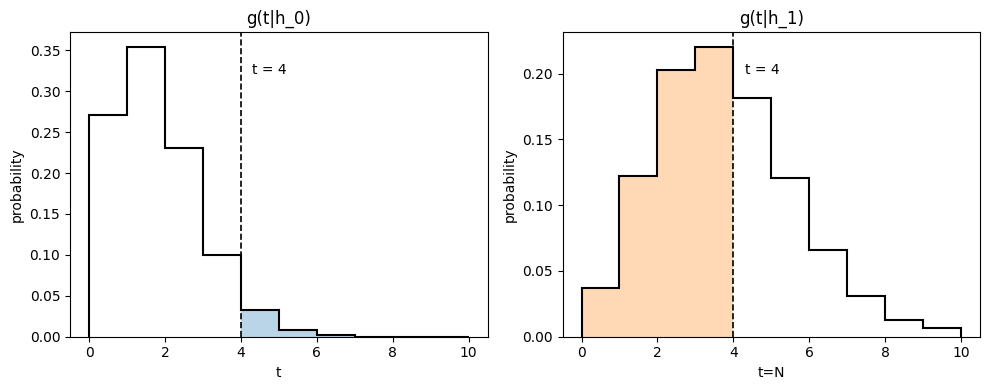

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()
bins = np.arange(0, 10 + 1)
t_c = 4

# ------------------ g(t | h0) ------------------
counts0, edges0, _ = axes[0].hist(h_0, bins=bins, density=True, histtype="step", linewidth=1.5, color="black")
for i in range(len(edges0)-1):
    if edges0[i] >= t_c:
        axes[0].bar(edges0[i], counts0[i], width=edges0[i+1]-edges0[i], align='edge', color="C0", alpha=0.3)
axes[0].axvline(t_c, color="black", linestyle="--", linewidth=1.2)
axes[0].text(t_c + 0.3, axes[0].get_ylim()[1]*0.9, "t = 4", rotation=0, verticalalignment='top')
axes[0].set_xlabel("t")
axes[0].set_ylabel("probability")
axes[0].set_title("g(t|h_0)")

# ------------------ g(t | h1) ------------------
counts1, edges1, _ = axes[1].hist(h_1, bins=bins, density=True, histtype="step", linewidth=1.5, color="black")
for i in range(len(edges1)-1):
    if edges1[i+1] <= t_c:
        axes[1].bar(edges1[i], counts1[i], width=edges1[i+1]-edges1[i], align='edge', color="C1", alpha=0.3)
axes[1].axvline(t_c, color="black", linestyle="--", linewidth=1.2)
axes[1].text(t_c + 0.3, axes[1].get_ylim()[1]*0.9, "t = 4", rotation=0, verticalalignment='top')
axes[1].set_xlabel("t=N")
axes[1].set_ylabel("probability")
axes[1].set_title("g(t|h_1)")

plt.tight_layout()
plt.show()


# Computing $\alpha$ and $\beta$: Power of Test, Type-1 and Type-2 Errors

In hypothesis testing, we define the following quantities for a test statistic $t$ and a critical threshold $t_c$.

---

### **Type-1 Error (False Positive)**  
Rejecting the null hypothesis $H_0$ when it is actually true.

$$
\alpha = P(t \ge t_c \mid H_0)
$$

If $g(t \mid H_0)$ is the probability density function (PDF) of $t$ under $H_0$, then:

$$
\alpha = \int_{t_c}^{\infty} g(t \mid H_0)\, dt
$$

---

### **Type-2 Error (False Negative)**  
Failing to reject the null hypothesis when the alternative hypothesis $H_1$ is true.

$$
\beta = P(t < t_c \mid H_1)
$$

If $g(t \mid H_1)$ is the PDF under $H_1$, then:

$$
\beta = \int_{-\infty}^{t_c} g(t \mid H_1)\, dt
$$

---

### **Power of the Test**

The probability of correctly rejecting the null hypothesis when the alternative is true:

$$
\text{Power} = 1 - \beta
$$

Using the PDF under $H_1$:

$$
\text{Power} = \int_{t_c}^{\infty} g(t \mid H_1)\, dt
$$

---

### **Summary of Regions**

- **Reject** \( H_0 \) **if:** \( t > t_c \)
- **Fail to reject** \( H_0 \) **if:** \( t < t_c \)

---


In [42]:
alpha = ROOT.Math.poisson_cdf_c(t_c-1 , lam_b)   # Type-1 error
beta  = ROOT.Math.poisson_cdf(t_c - 1, lam_sb)    # Type-2 error
power = 1 - beta     
print(f"The alpha is {alpha} , the beta is {beta} and the power of test is {power}")

The alpha is 0.04309545269207606 , the beta is 0.5803381974748109 and the power of test is 0.41966180252518914


# Loose Selection Criteria and Its Effect on the Power of the Test

Loose selection criteria typically reduce the discriminating power between the null hypothesis $H_0$ and the alternative hypothesis $H_1$.  

For example, suppose the loose selection gives:

$$
\nu_b = 2.53, \qquad \nu_s = 2.30
$$

where  
- $\nu_b$ is the expected count under $H_0$,  
- $\nu_s$ is the expected count under $H_1$.

If we fix the Type-1 error rate (alpha) at:

$$
\alpha = 0.043
$$

then the power of the test becomes:

$$
\text{Power} = P(t \ge t_c \mid H_1)
$$

where $t_c$ is chosen such that:

$$
P(t \ge t_c \mid H_0) = \alpha = 0.043
$$

In [55]:
def find_tc(lam, alpha):
    n = 0
    while True:
        p_value = ROOT.Math.poisson_cdf_c(n , lam) 
        print(p_value)
        if p_value < alpha:
            return n
        n += 1

In [56]:
find_tc(2.53,0.043)

0.920340979714102
0.71880365839078
0.4638589469167777
0.2488555735737023
0.11286593993420717
0.04405518531262267
0.015039983780521168


6

In [62]:
# the lose criteria power test is 
lam_b_ = 2.53
lam_sb_ = 2.30 + 2.53
t_c_ = 6
alpha = ROOT.Math.poisson_cdf_c(t_c_-1 , lam_b_)   # Type-1 error
beta  = ROOT.Math.poisson_cdf(t_c_ - 1, lam_sb_)    # Type-2 error
power = 1 - beta     
print(f"The alpha is {alpha} , the beta is {beta} and the power of test is {power}")

The alpha is 0.04405518531262267 , the beta is 0.6457608991507671 and the power of test is 0.35423910084923294


# Information about ROOT CDF function 
- **`poisson_cdf(n, λ)` gives:**  
  \[
  P(X \le n)
  \]

- **`poisson_cdf_c(n, λ)` gives:**  
  \[
  P(X > n)
  \]  
  (the complementary cumulative distribution function)

# The $CL_b$ and $CL_{s+b}$ Method

Let the observed test statistic be ( $t_{\mathrm{obs}} = 5$ ).

Compute:

- $p_0$: the p-value under the background-only hypothesis $H_0$  
- $p_1$: the p-value under the signal-plus-background hypothesis $H_{s+b}$

These correspond to the right-tail probabilities:

$p_0 = P(t \ge t_{\mathrm{obs}} \mid H_0), \qquad p_1 = P(t \ge t_{\mathrm{obs}} \mid H_{s+b})$

The confidence levels used in the CLs method are:

$CL_b = 1 - p_0$

$CL_{s+b} =  p_1$


A small p-value indicates an inconsistency with the tested hypothesis. The null hypothesis is rejected if the p-value $p_0$ is smaller than a chosen significance level $\alpha$. Typically, p-values are used for hypothesis tests with a fixed size $\alpha$ (significance tests) and for goodness-of-fit tests.


In [64]:
t_obs = 5
p_0 = ROOT.Math.poisson_cdf_c(t_obs-1 , lam_b)   
p_1 = ROOT.Math.poisson_cdf_c(t_obs-1 , lam_sb)
print(f"The p_0 is {p_0} and p_1 is {p_1}")

The p_0 is 0.010663033771890939 and p_1 is 0.23740962432666443


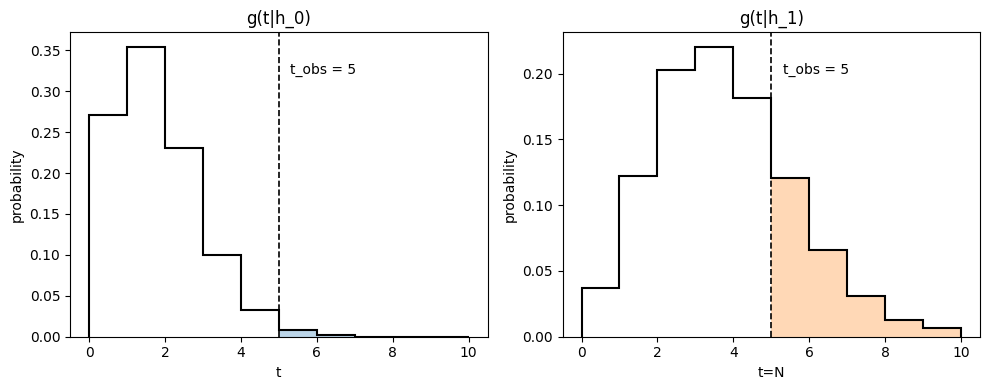

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()
bins = np.arange(0, 10 + 1)
t_obs = 5

# ------------------ g(t | h0) ------------------
counts0, edges0, _ = axes[0].hist(h_0, bins=bins, density=True, histtype="step", linewidth=1.5, color="black")
for i in range(len(edges0)-1):
    if edges0[i] >= t_obs:
        axes[0].bar(edges0[i], counts0[i], width=edges0[i+1]-edges0[i], align='edge', color="C0", alpha=0.3)
axes[0].axvline(t_obs, color="black", linestyle="--", linewidth=1.2)
axes[0].text(t_obs + 0.3, axes[0].get_ylim()[1]*0.9, "t_obs = 5", rotation=0, verticalalignment='top')
axes[0].set_xlabel("t")
axes[0].set_ylabel("probability")
axes[0].set_title("g(t|h_0)")

# ------------------ g(t | h1) ------------------
counts1, edges1, _ = axes[1].hist(h_1, bins=bins, density=True, histtype="step", linewidth=1.5, color="black")
for i in range(len(edges1)-1):
    if edges1[i] >= t_obs:
        axes[1].bar(edges1[i], counts1[i], width=edges1[i+1]-edges1[i], align='edge', color="C1", alpha=0.3)
axes[1].axvline(t_obs, color="black", linestyle="--", linewidth=1.2)
axes[1].text(t_obs + 0.3, axes[1].get_ylim()[1]*0.9, "t_obs = 5", rotation=0, verticalalignment='top')
axes[1].set_xlabel("t=N")
axes[1].set_ylabel("probability")
axes[1].set_title("g(t|h_1)")

plt.tight_layout()
plt.show()


For counting experiments that follow Poisson statistics, the significance is sometimes approximated by

$Z = \dfrac{S}{\sqrt{S + B}}$

where $S$ is the expected signal yield and $B$ is the expected background yield.

In [69]:
Z = ROOT.Math.normal_quantile(1 - p_0, 1.0)
print("p0 =", p_0)
print("Observed Z significance =", Z)

p0 = 0.010663033771890939
Observed Z significance = 2.3021614769922585


# Expected Signal Significance

The *expected significance* is computed using the **median expected outcome** under the signal-plus-background hypothesis.

## 1. Compute the Median Expected Count

For a Poisson distribution with mean $\lambda_{s+b}$, the median expected count is:

$$
t_{\text{med}} = \text{median}(\text{Poisson}(\lambda_{s+b}))
$$

This represents the typical observed value assuming signal plus background is true.

## 2. Compute the Background-Only p-value

Using the median value as a proxy for the experimental outcome, the background-only tail probability is:

$$
p_0^{\text{exp}} = P(t \ge t_{\text{med}} \mid \lambda_b)
$$


In [74]:
median_sb = int(poisson.median(mu=lam_sb))
print(median_sb)

3


In [76]:
p_0_expt = ROOT.Math.poisson_cdf_c(median_sb-1 , lam_b)   
Z_exp = ROOT.Math.normal_quantile(1 - p_0_expt, 1.0)
print("p0 =", p_0_expt)
print("Expected Z significance =", Z_exp)

p0 = 0.1428875109080303
Expected Z significance = 1.067435950284798


# Significance using $\frac{s}{\sqrt{s+b}}$

In [83]:
Z_s_b = lam_s/np.sqrt((lam_s+lam_b))
print("The significance using s/s+b is " ,Z_s_b)

The significance using s/s+b is  1.1009637651263606


# We conclude that the expected significance obtained from the quantile (median) method and from the approximation $\frac{S}{\sqrt{S + B}}$ are very close to each other.
